[2.87696662]
[[0.04656457 0.17915812 0.00345046]]
MSE: 3.059967618118514
RMSE: 1.749276312684338


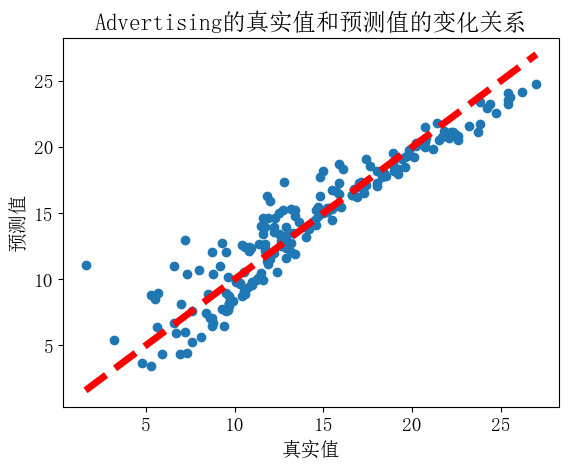

In [1]:
# 任务：广告和销售预估
# 数据集：Advertising
# 模型：Linear Regression Model
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='SimSun', size=14)
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

# 数据处理
data = pd.read_csv('../../data/csv/Advertising.csv')
X = data[['TV', 'Radio', 'Newspaper']]
y = data[['Sales']]

# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# 求解线性模型参数
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.intercept_)  # 常数项 [2.87696662]
print(linreg.coef_)       # 变量系数 [[0.04656457 0.17915812 0.00345046]]

# 交叉验证
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
predicted = cross_val_predict(linreg, X, y, cv=10)
print("MSE:",metrics.mean_squared_error(y, predicted))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))

# 画图描述真实值和预测值的变化关系
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=5)
ax.set_xlabel('真实值')
ax.set_ylabel('预测值')
plt.title('Advertising的真实值和预测值的变化关系')
plt.show()